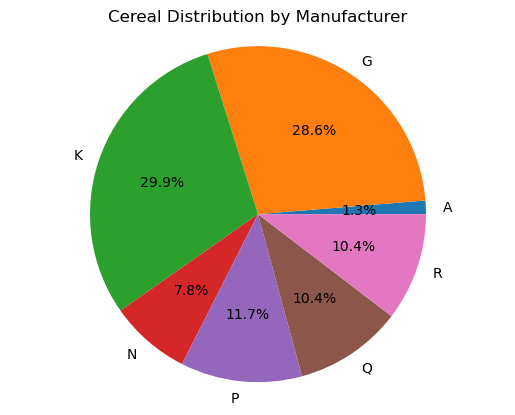

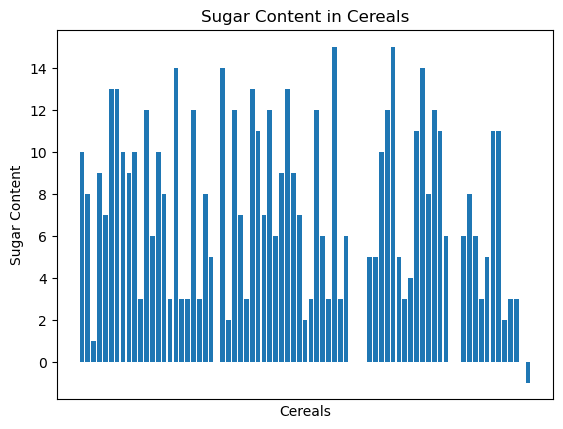

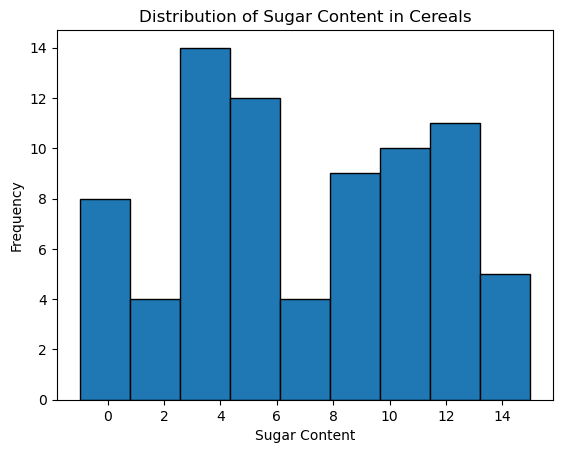

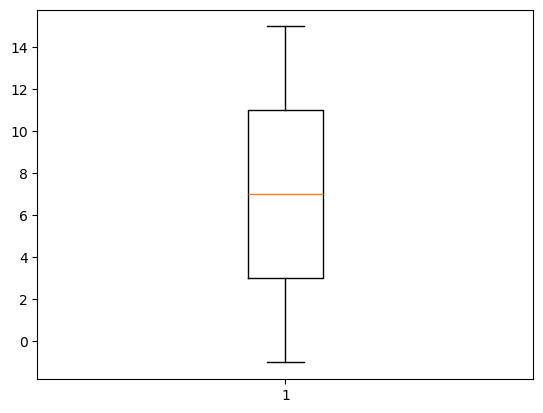

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt


db_filename = 'database/cereals.db'
conn = sqlite3.connect(db_filename)
c = conn.cursor()

c.execute('''SELECT Manufacturer, count(*) FROM cereals GROUP BY Manufacturer''')
counts = c.fetchall()
manuStats = pd.DataFrame.from_records(counts, columns=['manufacturer', 'value'])

plt.pie(manuStats['value'], labels=manuStats['manufacturer'], shadow=False, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Cereal Distribution by Manufacturer')
plt.show()

c.execute('''SELECT Cereal, Sugars FROM cereals''')
sugars = c.fetchall()
sugarFrame = pd.DataFrame.from_records(sugars, columns=['Cereal', 'Sugar'])

plt.bar(range(len(sugarFrame['Sugar'])), sugarFrame['Sugar'])
plt.xticks([])
plt.xlabel('Cereals')
plt.ylabel('Sugar Content')
plt.title('Sugar Content in Cereals')
plt.show()

c.execute('''SELECT Sugars FROM cereals''')
sugar = c.fetchall()
sugarFrame = pd.DataFrame.from_records(sugar, columns=['Sugar'])

plt.hist(sugarFrame['Sugar'], bins=9, edgecolor='black')
plt.xlabel('Sugar Content')
plt.ylabel('Frequency')
plt.title('Distribution of Sugar Content in Cereals')
plt.show()

c.execute('''SELECT Manufacturer, Sugars FROM cereals''')
sugarByMan = c.fetchall()
sugarBoxFrame = pd.DataFrame.from_records(sugarByMan, columns=['Manufacturer', 'Sugar'])


plt.boxplot(sugarFrame['Sugar'])
plt.show()

conn.close()